In [1]:
%pip install pandas numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
%pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------ --------------------------------- 1.3/8.1 MB 8.4 MB/s eta 0:00:01
   -------------------- ------------------- 4.2/8.1 MB 11.0 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 11.3 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 10.3 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ------------------------------------ --- 2.1/2.3 MB 13.0 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 9.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   -------------- ------------------------- 2.6/7.0 MB 13.8 MB/s eta 0:00:01
   ----------------------------- ---------- 5.2/7.0 MB 12.3 MB/s eta 0:00:01
   ---------------------------------------- 7.0/7.0 MB 11.1 MB

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
%pip install scipy

   ---------------------------------------- 0.0/36.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/36.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/36.3 MB ? eta -:--:--
   ---------------------------------------- 0.3/36.3 MB ? eta -:--:--
   ---------------------------------------- 0.3/36.3 MB ? eta -:--:--
    --------------------------------------- 0.5/36.3 MB 622.7 kB/s eta 0:00:58
    --------------------------------------- 0.5/36.3 MB 622.7 kB/s eta 0:00:58
    --------------------------------------- 0.5/36.3 MB 622.7 kB/s eta 0:00:58
    --------------------------------------- 0.8/36.3 MB 479.7 kB/s eta 0:01:15
    --------------------------------------- 0.8/36.3 MB 479.7 kB/s eta 0:01:15
   - -------------------------------------- 1.0/36.3 MB 559.3 kB/s eta 0:01:04
   - -------------------------------------- 1.3/36.3 MB 610.3 kB/s eta 0:00:58
   - -------------------------------------- 1.6/36.3 MB 655.4 kB/s eta 0:00:54
   - -------------


[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
%load_ext autoreload
%autoreload 2

import sys
import os
sys.path.append(os.path.abspath(".."))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import sys
import os

# This tells Python to look one level up from the 'notebooks' folder
sys.path.append(os.path.abspath(".."))

# Now these will work!
from src.io import load_data
from src.mortality_models import poisson_mx
from src.life_table import (
    ax_constant,
    mx_to_qx,
    qx_delta_method,
    build_life_table
)

In [15]:
from src.io import load_data
from src.mortality_models import poisson_mx, mx_to_qx_delta, poisson_mx_exact_ci
from src.life_table import (
    ax_constant,
    mx_to_qx,
    qx_delta_method,
    build_life_table
)

df = load_data(
    "../data/france_deaths_clean.csv",
    "../data/france_population_clean.csv"
)

df = df[
    (df.Year == 1816) &
    (df.Sex == "Female") &
    (df.Age >= 1) &
    (df.Age <= 85)
].sort_values("Age")

df = poisson_mx(df)
df = ax_constant(df, 0.5)
df = mx_to_qx(df)
df = qx_delta_method(df)
df = build_life_table(df)


In [16]:
# View the first few rows to see the calculated life table
print(df[['Age', 'Sex', 'mx', 'qx', 'lx', 'dx', 'ex']].head(10))

# Check the final life expectancy (e0) at birth for Age 0
print("\nLife expectancy at birth (e0):")
print(df[df.Age == 1]['ex'].iloc[0])

    Age     Sex        mx        qx             lx           dx         ex
1     1  Female  0.048414  0.047270  100000.000000  4726.960249  47.988444
2     2  Female  0.033825  0.033262   95273.039751  3169.003155  49.344577
3     3  Female  0.022675  0.022421   92104.036596  2065.072180  50.025162
4     4  Female  0.015602  0.015482   90038.964416  1393.953360  50.161037
5     5  Female  0.013895  0.013799   88645.011056  1223.216092  49.941963
6     6  Female  0.012103  0.012030   87421.794964  1051.672820  49.633761
7     7  Female  0.010419  0.010365   86370.122144   895.248887  49.232031
8     8  Female  0.008924  0.008884   85474.873257   759.349407  48.742441
9     9  Female  0.007711  0.007681   84715.523850   650.736936  48.174864
10   10  Female  0.006261  0.006241   84064.786914   524.669786  47.543910

Life expectancy at birth (e0):
47.98844410878212


In [17]:
# 1. Load data
df = load_data("../data/france_deaths_clean.csv", "../data/france_population_clean.csv")

# 2. Estimate mx (creates mx, mx_lower, mx_upper)
df = poisson_mx(df)

# 3. Transform to qx (creates qx, qx_lower, qx_upper)
df = mx_to_qx_delta(df)

# 4. Now filter and view
subset = df[(df["Year"] == 2020) & (df["Sex"] == "Female")]
print(subset[["Age", "mx", "qx", "qx_lower", "qx_upper"]].head(10))

c:\Users\PC-HP\Desktop\insea\Mortality Project\src\mortality_models.py:19: RuntimeWarning: divide by zero encountered in divide
  df["mx"] = D / E
c:\Users\PC-HP\Desktop\insea\Mortality Project\src\mortality_models.py:19: RuntimeWarning: invalid value encountered in divide
  df["mx"] = D / E


       Age        mx        qx  qx_lower  qx_upper
21756    0  0.003192  0.003187  0.002995  0.003379
21757    1  0.000210  0.000210  0.000161  0.000260
21758    2  0.000144  0.000144  0.000104  0.000184
21759    3  0.000077  0.000077  0.000048  0.000106
21760    4  0.000072  0.000072  0.000044  0.000099
21761    5  0.000061  0.000061  0.000036  0.000086
21762    6  0.000055  0.000055  0.000032  0.000079
21763    7  0.000047  0.000047  0.000025  0.000068
21764    8  0.000059  0.000059  0.000035  0.000083
21765    9  0.000045  0.000045  0.000024  0.000066


c:\Users\PC-HP\Desktop\insea\Mortality Project\src\mortality_models.py:25: RuntimeWarning: divide by zero encountered in divide
  df["mx_lower"] = lambda_lower / E
c:\Users\PC-HP\Desktop\insea\Mortality Project\src\mortality_models.py:26: RuntimeWarning: divide by zero encountered in divide
  df["mx_upper"] = lambda_upper / E


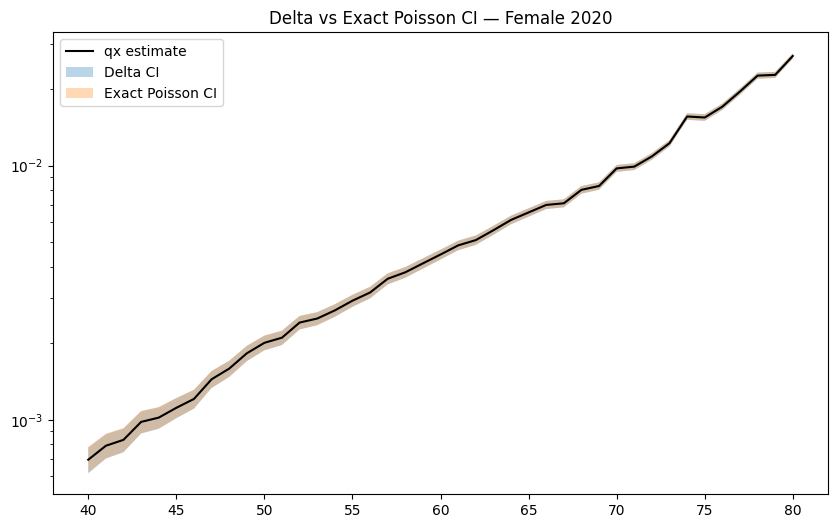

In [24]:
import matplotlib.pyplot as plt

df = poisson_mx_exact_ci(df)
df = mx_to_qx_delta(df)

def mx_to_qx(mx, ax=0.5):

    return mx / (1 + (1 - ax) * mx)

df["qx_lower_exact"] = mx_to_qx(df["mx_lower_exact"])
df["qx_upper_exact"] = mx_to_qx(df["mx_upper_exact"])

sub = df[
    (df["Year"] == 2020) &
    (df["Sex"] == "Female") &
    (df["Age"].between(40, 80))
]

plt.figure(figsize=(10,6))
plt.plot(sub["Age"], sub["qx"], label="qx estimate", color="black")

plt.fill_between(
    sub["Age"],
    sub["qx_lower"],
    sub["qx_upper"],
    alpha=0.3,
    label="Delta CI"
)

plt.fill_between(
    sub["Age"],
    sub["qx_lower_exact"],
    sub["qx_upper_exact"],
    alpha=0.3,
    label="Exact Poisson CI"
)

plt.yscale("log")
plt.legend()
plt.title("Delta vs Exact Poisson CI — Female 2020")
plt.show()
